<a href="https://colab.research.google.com/github/prakhar-kt/Tensorflow-deep-learning/blob/main/MNIST_classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

####Import TensorFlow

In [15]:
import tensorflow as tf
print(tf.__version__)

2.8.2


#### Import the required libraries

In [16]:
import numpy as np 
import matplotlib.pyplot as plt
from tensorflow.keras.layers import Input, Conv2D, Dense, Flatten, Dropout
from tensorflow.keras.models import Model

#### Load the dataset

In [17]:
fashion_mnist = tf.keras.datasets.fashion_mnist
(x_train, y_train) , (x_test, y_test) = fashion_mnist.load_data()
x_train, x_test = x_train/255.0, x_test/255.0
print(f"x_train shape : {x_train.shape}")
print(f"y_train shape: {y_train.shape}")

x_train shape : (60000, 28, 28)
y_train shape: (60000,)


#### We have a 2d dataset(28* 28) of 60000 images. Convert this to 3d images

In [18]:
x_train = np.expand_dims(x_train, -1)
x_test = np.expand_dims(x_test, -1)
print(x_train.shape)

(60000, 28, 28, 1)


#### No of classes

In [19]:
k = len(set(y_train)) # set gives the unique values in the y_train data
print("No of classes:", k)

No of classes: 10


In [20]:
x_train[0].shape

(28, 28, 1)

#### Build the model using Functional API

In [21]:
i = Input(shape=x_train[0].shape)
x = Conv2D(32,(3,3),strides=2, activation='relu')(i)
x = Conv2D(64,(3,3), strides=2, activation='relu')(x)
x = Conv2D(128, (3,3), strides=2, activation='relu')(x)
x = Flatten()(x)
x = Dropout(0.2)(x)
x = Dense(512, activation='relu')(x)
x = Dropout(0.2)(x)
x = Dense(k,  activation='sigmoid')(x)

model = Model(i,x)

In [22]:
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

model_1 = model.fit(x_train, y_train, validation_data=(x_test, y_test), epochs=10)

Epoch 1/10
1875/1875 [==============================] - 7s 3ms/step - loss: 0.5243 - accuracy: 0.8068 - val_loss: 0.4119 - val_accuracy: 0.8445
Epoch 2/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.3690 - accuracy: 0.8627 - val_loss: 0.3520 - val_accuracy: 0.8643
Epoch 3/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.3192 - accuracy: 0.8814 - val_loss: 0.3163 - val_accuracy: 0.8830
Epoch 4/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.2852 - accuracy: 0.8918 - val_loss: 0.3058 - val_accuracy: 0.8881
Epoch 5/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.2588 - accuracy: 0.9026 - val_loss: 0.2943 - val_accuracy: 0.8918
Epoch 6/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.2372 - accuracy: 0.9090 - val_loss: 0.2928 - val_accuracy: 0.8943
Epoch 7/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.2179 - accuracy: 0.9168 - val_loss: 0.2841 - val_accuracy:

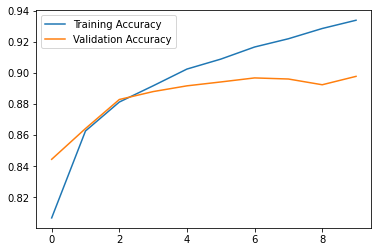

In [23]:
plt.plot(model_1.history['accuracy'], label='Training Accuracy');
plt.plot(model_1.history['val_accuracy'], label='Validation Accuracy');
plt.legend();

The model seems to be overfitting as the validation accuracy is plateauing out after 7 epochs while training accuracy continues to improve

In [31]:
y_pred = model.predict(x_test)
y_pred[0]

array([1.3618352e-04, 2.4976139e-06, 1.5110000e-05, 1.1892901e-06,
       1.4674830e-05, 2.1242265e-01, 1.8409908e-05, 1.3261484e-01,
       5.9414935e-05, 9.9999166e-01], dtype=float32)

In [32]:
y_pred = model.predict(x_test).argmax(axis=1)
y_pred[0]

9

#### Display the confusion matrix for the model

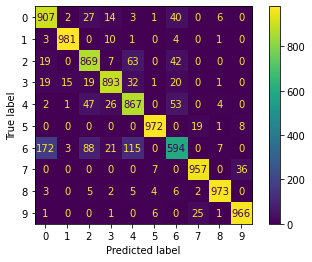

In [28]:
from sklearn.metrics import ConfusionMatrixDisplay
ConfusionMatrixDisplay.from_predictions(y_test,y_pred);

It seems that most of the missclassification has occured for the Actual Label = 6, which has been misclassified as Label = 0 or Label = 4

In [45]:
Labels = "T-shirt/top,Trouser,Pullover,Dress,Coat,Sandal,Shirt,Sneaker,Bag,Ankle boot".split(',')
Labels

['T-shirt/top',
 'Trouser',
 'Pullover',
 'Dress',
 'Coat',
 'Sandal',
 'Shirt',
 'Sneaker',
 'Bag',
 'Ankle boot']

From the Label names above, we can see that the most misclassified item has been 'Shirt', which has been either misclassified as a 'Coat' or a 'T-shirt/top'

#### Show misclassified labels examples

Text(0.5, 1.0, 'True Label: T-shirt/top, Predicted Label: Coat')

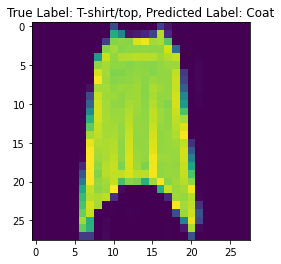

In [50]:
misclassified_idx = np.where(y_test != y_pred)[0]
i = np.random.choice(misclassified_idx)
plt.imshow(x_test[i].reshape(28,28))
plt.title(f"True Label: {Labels[y_test[i]]}, Predicted Label: {Labels[y_pred[i]]}")


In [34]:
misclassified_idx = np.where(y_test != y_pred)[0]
misclassified_idx

array([  21,   23,   25, ..., 9969, 9977, 9991])